# Data Cleaning
In this notebook we will clean the data. We will separate the right eye data and the left eye data.

In [1]:
# import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
disease_map = {
 'age-related macular degeneration':'A',
 'cataract':'C',
 'diabetic retinopathy':'D',
 'dry age-related macular degeneration':'A',
 'glaucoma':'G',
 'hypertensive retinopathy':'H',
 'mild nonproliferative retinopathy':'D',
 'moderate non proliferative retinopathy':'D',
 'myopia retinopathy':'M',
 'myopic maculopathy':'M',
 'myopic retinopathy':'M',
 'normal fundus':'N',
 'pathological myopia':'M',
 'proliferative diabetic retinopathy':'D',
 'severe nonproliferative retinopathy':'D',
 'severe proliferative diabetic retinopathy':'D',
 'suspected cataract':'C',
 'suspected diabetic retinopathy':'D',
 'suspected glaucoma':'G',
 'suspected moderate non proliferative retinopathy':'D',
 'suspicious diabetic retinopathy':'D',
 'wet age-related macular degeneration':'A',
 'anterior segment image':'DELETE',
 'image offset':'DELETE',
 'low image quality':'DELETE',
 'no fundus image':'DELETE',
 'optic disk photographically invisible':'DELETE'}


In [3]:
original_df = pd.read_excel("E:/odir-dataset/ODIR-5K/ODIR-5K/data.xlsx")

In [4]:
original_df.head(20)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1
5,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
6,6,60,Male,6_left.jpg,6_right.jpg,macular epiretinal membrane,moderate non proliferative retinopathy，epireti...,0,1,0,0,0,0,0,1
7,7,60,Female,7_left.jpg,7_right.jpg,drusen,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1
8,8,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
9,9,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration,0,0,0,0,0,0,0,1


In [5]:
left_eye_df = original_df[['Left-Fundus','Left-Diagnostic Keywords']].copy()
left_eye_df.head(15)

,Left-Fundus,Left-Diagnostic Keywords
0,0_left.jpg,cataract
1,1_left.jpg,normal fundus
2,2_left.jpg,laser spot，moderate non proliferative retinopathy
3,3_left.jpg,normal fundus
4,4_left.jpg,macular epiretinal membrane
5,5_left.jpg,moderate non proliferative retinopathy
6,6_left.jpg,macular epiretinal membrane
7,7_left.jpg,drusen
8,8_left.jpg,normal fundus
9,9_left.jpg,normal fundus


In [6]:
left_eye_df.shape

(3500, 2)

In [7]:
left_eye_df['N'] = 0
left_eye_df['D'] = 0
left_eye_df['G'] = 0
left_eye_df['C'] = 0
left_eye_df['A'] = 0
left_eye_df['H'] = 0
left_eye_df['M'] = 0
left_eye_df['O'] = 0
left_eye_df['DELETE'] = 0

In [8]:
left_eye_df.head()

,Left-Fundus,Left-Diagnostic Keywords,N,D,G,C,A,H,M,O,DELETE
0,0_left.jpg,cataract,0,0,0,0,0,0,0,0,0
1,1_left.jpg,normal fundus,0,0,0,0,0,0,0,0,0
2,2_left.jpg,laser spot，moderate non proliferative retinopathy,0,0,0,0,0,0,0,0,0
3,3_left.jpg,normal fundus,0,0,0,0,0,0,0,0,0
4,4_left.jpg,macular epiretinal membrane,0,0,0,0,0,0,0,0,0


In [9]:
i = 0
for keywords in left_eye_df['Left-Diagnostic Keywords']:
    keywords = keywords.strip().split('，')
    for keyword in keywords:
        if not (keyword == 'lens dust'):
            left_eye_df.loc[i,disease_map.get(keyword, 'O')] = 1
    i += 1
    

In [10]:
left_eye_df.loc[2, 'Left-Fundus']

'2_left.jpg'

In [11]:
left_eye_df.head()
# left_eye_df[left_eye_df['Left-Diagnostic Keywords'] == 'lens dust，normal fundus']

,Left-Fundus,Left-Diagnostic Keywords,N,D,G,C,A,H,M,O,DELETE
0,0_left.jpg,cataract,0,0,0,1,0,0,0,0,0
1,1_left.jpg,normal fundus,1,0,0,0,0,0,0,0,0
2,2_left.jpg,laser spot，moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,0
3,3_left.jpg,normal fundus,1,0,0,0,0,0,0,0,0
4,4_left.jpg,macular epiretinal membrane,0,0,0,0,0,0,0,1,0


In [12]:
left_eye_df.to_excel('C:/Users/User/DeepLearning/DL-Project/left_eye.xlsx')

In [13]:
right_eye_df = original_df[['Right-Fundus','Right-Diagnostic Keywords']].copy()
right_eye_df.head(15)

,Right-Fundus,Right-Diagnostic Keywords
0,0_right.jpg,normal fundus
1,1_right.jpg,normal fundus
2,2_right.jpg,moderate non proliferative retinopathy
3,3_right.jpg,branch retinal artery occlusion
4,4_right.jpg,mild nonproliferative retinopathy
5,5_right.jpg,moderate non proliferative retinopathy
6,6_right.jpg,moderate non proliferative retinopathy，epireti...
7,7_right.jpg,mild nonproliferative retinopathy
8,8_right.jpg,normal fundus
9,9_right.jpg,vitreous degeneration


In [14]:
right_eye_df.shape

(3500, 2)

In [15]:
right_eye_df['N'] = 0
right_eye_df['D'] = 0
right_eye_df['G'] = 0
right_eye_df['C'] = 0
right_eye_df['A'] = 0
right_eye_df['H'] = 0
right_eye_df['M'] = 0
right_eye_df['O'] = 0
right_eye_df['DELETE'] = 0

In [16]:
right_eye_df.head()

,Right-Fundus,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,DELETE
0,0_right.jpg,normal fundus,0,0,0,0,0,0,0,0,0
1,1_right.jpg,normal fundus,0,0,0,0,0,0,0,0,0
2,2_right.jpg,moderate non proliferative retinopathy,0,0,0,0,0,0,0,0,0
3,3_right.jpg,branch retinal artery occlusion,0,0,0,0,0,0,0,0,0
4,4_right.jpg,mild nonproliferative retinopathy,0,0,0,0,0,0,0,0,0


In [17]:
i = 0
for keywords in right_eye_df['Right-Diagnostic Keywords']:
    keywords = keywords.strip().split('，')
    for keyword in keywords:
        if not (keyword == 'lens dust'):
            right_eye_df.loc[i,disease_map.get(keyword, 'O')] = 1
    i += 1

In [18]:
keywords

['hypertensive retinopathy', 'age-related macular degeneration']

In [19]:
right_eye_df.head(15)

,Right-Fundus,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,DELETE
0,0_right.jpg,normal fundus,1,0,0,0,0,0,0,0,0
1,1_right.jpg,normal fundus,1,0,0,0,0,0,0,0,0
2,2_right.jpg,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,0
3,3_right.jpg,branch retinal artery occlusion,0,0,0,0,0,0,0,1,0
4,4_right.jpg,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,0
5,5_right.jpg,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,0
6,6_right.jpg,moderate non proliferative retinopathy，epireti...,0,1,0,0,0,0,0,1,0
7,7_right.jpg,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,0
8,8_right.jpg,normal fundus,1,0,0,0,0,0,0,0,0
9,9_right.jpg,vitreous degeneration,0,0,0,0,0,0,0,1,0


In [20]:
right_eye_df.to_excel('C:/Users/User/DeepLearning/DL-Project/right_eye.xlsx')

In [21]:
left_delete_index = list(left_eye_df[left_eye_df['DELETE'] == 1].index)
left_delete_index

[493,
 1170,
 1178,
 1229,
 1461,
 2829,
 2889,
 3015,
 3032,
 3147,
 3288,
 3293,
 3354,
 3408]

In [22]:
updated_left_eye_df = left_eye_df.drop(left_delete_index, axis=0)
updated_left_eye_df

,Left-Fundus,Left-Diagnostic Keywords,N,D,G,C,A,H,M,O,DELETE
0,0_left.jpg,cataract,0,0,0,1,0,0,0,0,0
1,1_left.jpg,normal fundus,1,0,0,0,0,0,0,0,0
2,2_left.jpg,laser spot，moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,0
3,3_left.jpg,normal fundus,1,0,0,0,0,0,0,0,0
4,4_left.jpg,macular epiretinal membrane,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3495,4686_left.jpg,severe nonproliferative retinopathy,0,1,0,0,0,0,0,0,0
3496,4688_left.jpg,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,0
3497,4689_left.jpg,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,0
3498,4690_left.jpg,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,0


In [23]:
updated_left_eye_df[updated_left_eye_df['DELETE'] == 1]

,Left-Fundus,Left-Diagnostic Keywords,N,D,G,C,A,H,M,O,DELETE


In [24]:
updated_left_eye_df.drop('DELETE', axis=1, inplace=True)
updated_left_eye_df

,Left-Fundus,Left-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0_left.jpg,cataract,0,0,0,1,0,0,0,0
1,1_left.jpg,normal fundus,1,0,0,0,0,0,0,0
2,2_left.jpg,laser spot，moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3_left.jpg,normal fundus,1,0,0,0,0,0,0,0
4,4_left.jpg,macular epiretinal membrane,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
3495,4686_left.jpg,severe nonproliferative retinopathy,0,1,0,0,0,0,0,0
3496,4688_left.jpg,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
3497,4689_left.jpg,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0
3498,4690_left.jpg,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0


In [25]:
updated_left_eye_df.to_excel('C:/Users/User/DeepLearning/DL-Project/updated_left_eye.xlsx')

In [26]:
right_delete_index = list(right_eye_df[right_eye_df['DELETE'] == 1].index)
right_delete_index

[371,
 1157,
 1244,
 1462,
 2840,
 2941,
 2994,
 3015,
 3042,
 3058,
 3120,
 3176,
 3244,
 3274,
 3429]

In [27]:
updated_right_eye_df = right_eye_df.drop(right_delete_index, axis=0)
updated_right_eye_df

,Right-Fundus,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,DELETE
0,0_right.jpg,normal fundus,1,0,0,0,0,0,0,0,0
1,1_right.jpg,normal fundus,1,0,0,0,0,0,0,0,0
2,2_right.jpg,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,0
3,3_right.jpg,branch retinal artery occlusion,0,0,0,0,0,0,0,1,0
4,4_right.jpg,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3495,4686_right.jpg,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,0
3496,4688_right.jpg,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,0
3497,4689_right.jpg,normal fundus,1,0,0,0,0,0,0,0,0
3498,4690_right.jpg,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,0


In [28]:
updated_right_eye_df[updated_right_eye_df['DELETE'] == 1]

,Right-Fundus,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,DELETE


In [29]:
updated_right_eye_df.drop('DELETE', axis=1, inplace=True)
updated_right_eye_df

,Right-Fundus,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0_right.jpg,normal fundus,1,0,0,0,0,0,0,0
1,1_right.jpg,normal fundus,1,0,0,0,0,0,0,0
2,2_right.jpg,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
3,3_right.jpg,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4_right.jpg,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3495,4686_right.jpg,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0
3496,4688_right.jpg,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
3497,4689_right.jpg,normal fundus,1,0,0,0,0,0,0,0
3498,4690_right.jpg,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0


In [30]:
updated_right_eye_df.to_excel('C:/Users/User/DeepLearning/DL-Project/updated_right_eye.xlsx')

### Get the dimensions of all the images

In [31]:
dimensions_left_df = pd.DataFrame()
dimensions_left_df['Left-Fundus'] = None
dimensions_left_df.head()

,Left-Fundus


In [32]:
dimensions_left_df['Left-Fundus'] = updated_left_eye_df['Left-Fundus']
dimensions_left_df.head()

,Left-Fundus
0,0_left.jpg
1,1_left.jpg
2,2_left.jpg
3,3_left.jpg
4,4_left.jpg


In [33]:
dimensions_left_df.tail()

,Left-Fundus
3495,4686_left.jpg
3496,4688_left.jpg
3497,4689_left.jpg
3498,4690_left.jpg
3499,4784_left.jpg


In [34]:
import os
from PIL import Image

i=0
for file in updated_left_eye_df['Left-Fundus']:
    index = updated_left_eye_df.index[i]
    file_path = f'E:/odir-dataset/ODIR-5K/ODIR-5K/Training Images/{file}'
    with Image.open(file_path) as img:
        width, height = img.size
    dimensions_left_df.loc[index, 'Width'] = width
    dimensions_left_df.loc[index, 'Height'] = height
    i+=1
dimensions_left_df.head()

,Left-Fundus,Width,Height
0,0_left.jpg,2304.0,1728.0
1,1_left.jpg,3456.0,2304.0
2,2_left.jpg,2048.0,1536.0
3,3_left.jpg,320.0,316.0
4,4_left.jpg,1920.0,894.0


In [35]:
dimensions_left_df.describe()

,Width,Height
count,3486.000000,3486.000000
mean,2465.124211,1807.546185
std,619.394971,433.407357
min,250.000000,188.000000
25%,2048.000000,1632.000000
50%,2592.000000,1728.000000
75%,2592.000000,1944.000000
max,5184.000000,3456.000000


In [36]:
dimensions_left_df.tail()

,Left-Fundus,Width,Height
3495,4686_left.jpg,2592.0,1728.0
3496,4688_left.jpg,2592.0,1728.0
3497,4689_left.jpg,2592.0,1728.0
3498,4690_left.jpg,1920.0,1296.0
3499,4784_left.jpg,2592.0,1944.0


In [37]:
dimensions_left_df.shape

(3486, 3)

<AxesSubplot:xlabel='Width', ylabel='Height'>

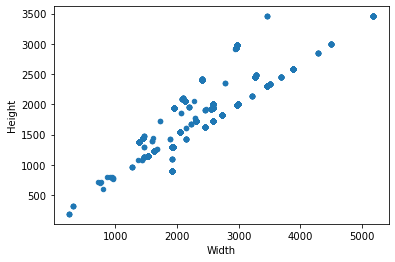

In [38]:
dimensions_left_df.plot.scatter(x=1, y=2)

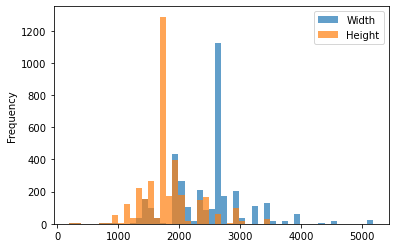

In [39]:
dimensions_left_df.plot.hist(bins=50, alpha=0.7)
plt.show()